## Observations and Insights 

### Three observations or inferences that can be made from the data

1.	 Based on the Bar Plots information, we can see that the number of mice for each Drug Regimen decreased on each Time Point that passed. For some of the Drug Regimens the final number of mice at the end of the study was especially different to the number of mice at the beginning of the study. This might be related with the effectiveness of the drug and its effects on the mice.

2.	Even though that the data for the four most promising treatment regimens did not show outliers, we can see on the Box Plot of these, the Capomulin and Ramicane drug regimens showed a wider range of Tumor volumes along their Distributions, whereas Infubinol and Ceftamin drug treatments showed more consistent results for the final volume of the Tumors in the last Time Point.

3.	Finally, we can see that there is a high correlation between a Mouse Weight and the Average Tumor Volume and our Linear Regression Model can predict these two values in 90% of the cases based on the r-squared value that we obtained which is 0.9034966277438606


In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data=mouse_metadata.merge(study_results,on="Mouse ID")
complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [25]:
# Checking the number of mice in the DataFrame.

total_mice=len(study_results["Mouse ID"].unique())

pd.DataFrame({
    "Total number of mice": [total_mice]
})

,Total number of mice
0,249


In [26]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

study_results[study_results.duplicated(subset=['Mouse ID','Timepoint'])]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,0,45.000000,0
360,g989,5,47.570392,0
681,g989,10,49.880528,0
869,g989,15,53.442020,0
1111,g989,20,54.657650,1


In [27]:
# Optional: Get all the data for the duplicate mouse ID. 

study_results.loc[study_results["Mouse ID"]=="g989",:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

complete_data=complete_data.set_index("Mouse ID")

clean_complete_data=complete_data.drop(index='g989')
clean_complete_data=clean_complete_data.reset_index()
clean_complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [29]:
# Checking the number of mice in the clean DataFrame.

total_mice=len(clean_complete_data["Mouse ID"].unique())

pd.DataFrame({
    "Total number of mice": [total_mice]
})

,Total number of mice
0,248


## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

clean_complete_data_stats=clean_complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg({np.mean,np.median,np.var,np.std,st.sem})
clean_complete_data_stats=clean_complete_data_stats[["mean","median","var","std","sem"]]
clean_complete_data_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [31]:
mice_per_timepoint=clean_complete_data[["Mouse ID","Drug Regimen","Timepoint"]]

mice=mice_per_timepoint.groupby(["Timepoint","Drug Regimen"]).count().reset_index()

mice_plot_data=pd.DataFrame(mice).rename(columns={"Mouse ID":"Mice"})
mice_plot_data.head()

,Timepoint,Drug Regimen,Mice
0,0,Capomulin,25
1,0,Ceftamin,25
2,0,Infubinol,25
3,0,Ketapril,25
4,0,Naftisol,25


Text(0, 0.5, 'Number of Mice')

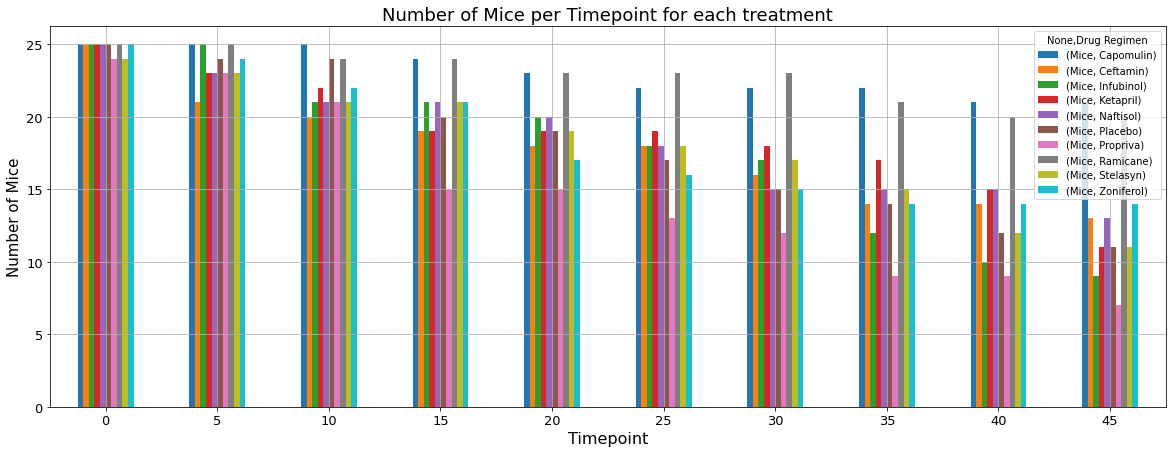

In [32]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

data = mice_plot_data.set_index(['Timepoint', 'Drug Regimen'])
mice_pandas_plot=data.unstack().plot(kind='bar',figsize=(20,7), rot=0,fontsize=13, grid=True)
mice_pandas_plot.set_title('Number of Mice per Timepoint for each treatment',fontsize=18)
mice_pandas_plot.set_xlabel('Timepoint',fontsize=16)
mice_pandas_plot.set_ylabel('Number of Mice',fontsize=15)

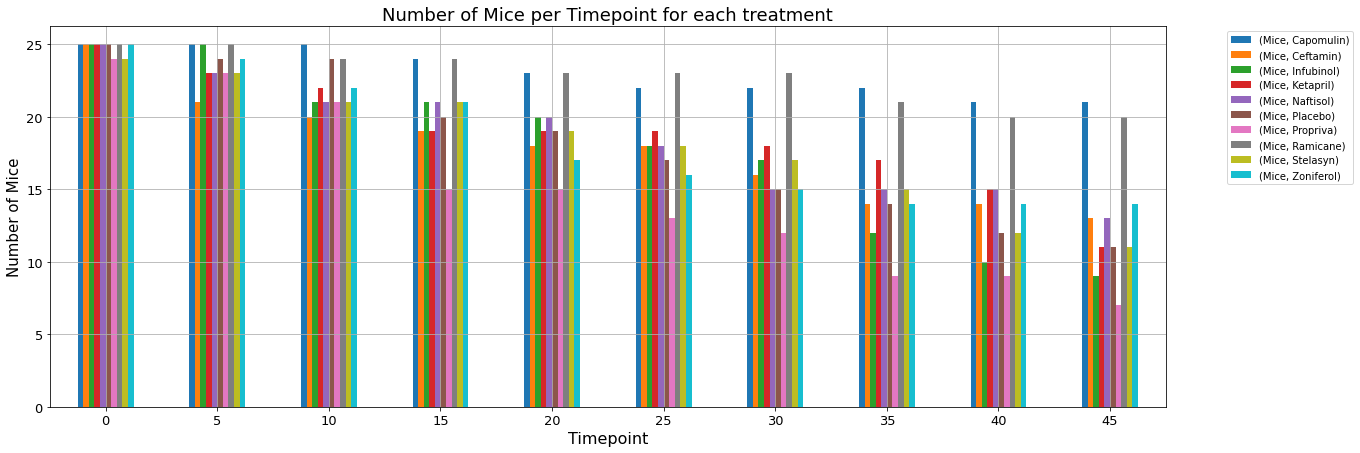

In [33]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

data = mice_plot_data.set_index(['Timepoint', 'Drug Regimen'])
mice_pandas_plot=data.unstack().plot(kind='bar', figsize=(20,7),rot=0,fontsize=13, grid=True)
plt.title('Number of Mice per Timepoint for each treatment',fontsize=18)
plt.xlabel('Timepoint',fontsize=16)
plt.ylabel('Number of Mice',fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

## Pie Plots

In [34]:
pie_plot_data=clean_complete_data[["Mouse ID","Sex"]]

pie_plot_data=pie_plot_data[~pie_plot_data.duplicated(subset=['Mouse ID'])]
pie_plot_data=pie_plot_data.groupby("Sex").count()
pie_plot_data

,Mouse ID
Sex,
Female,123
Male,125


Text(0.5, 1.0, 'Sex of Mice')

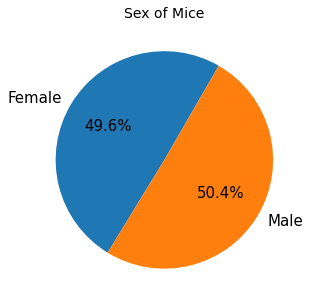

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_sex_pandas=pie_plot_data.plot(kind="pie", y='Mouse ID',figsize=(5, 5),startangle=60,autopct='%1.1f%%',fontsize=15,legend=False)
mice_sex_pandas.set_ylabel('')
mice_sex_pandas.set_title('Sex of Mice',fontsize=14)

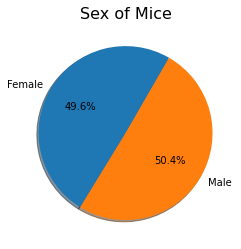

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels=pie_plot_data.reset_index()
labels=labels["Sex"]
mice_sex_pyplot=plt.pie(pie_plot_data["Mouse ID"],labels=labels, autopct="%1.1f%%",shadow=True, startangle=60)
plt.title('Sex of Mice',fontsize=16)
plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
import scipy.stats as sts

promising_treatments=mice_plot_data[mice_plot_data["Timepoint"]==45]

promising_treatments=promising_treatments.loc[promising_treatments["Drug Regimen"].isin(["Capomulin", "Ramicane","Infubinol","Ceftamin"])]

promising_treatments=promising_treatments.groupby("Timepoint").sum()
promising_treatments   

,Mice
Timepoint,
45,63


In [38]:
tumor_volume_across_promising_treatments=clean_complete_data.loc[clean_complete_data["Drug Regimen"].isin(["Capomulin", "Ramicane","Infubinol","Ceftamin"]) & (clean_complete_data["Timepoint"]==45)]

each_drug_tumor_volume=tumor_volume_across_promising_treatments[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

each_drug_tumor_volume=each_drug_tumor_volume.groupby(["Drug Regimen","Mouse ID"]).mean().reset_index()
each_drug_tumor_volume

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,g288,37.074024
3,Capomulin,g316,40.159220
4,Capomulin,i557,47.685963
...,...,...,...
58,Ramicane,q597,45.220869
59,Ramicane,r811,37.225650
60,Ramicane,s508,30.276232
61,Ramicane,u196,40.667713


In [39]:
each_drug_tumor_volume["Drug Regimen"].unique()

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane'], dtype=object)

In [40]:
capomulin_each_drug_tumor_volume=each_drug_tumor_volume.loc[each_drug_tumor_volume["Drug Regimen"]=="Capomulin"]
capomulin_each_drug_tumor_volume=capomulin_each_drug_tumor_volume["Tumor Volume (mm3)"]

ramicane_each_drug_tumor_volume=each_drug_tumor_volume.loc[each_drug_tumor_volume["Drug Regimen"]=="Ramicane"]
ramicane_each_drug_tumor_volume=ramicane_each_drug_tumor_volume["Tumor Volume (mm3)"]

infubinol_each_drug_tumor_volume=each_drug_tumor_volume.loc[each_drug_tumor_volume["Drug Regimen"]=="Infubinol"]
infubinol_each_drug_tumor_volume=infubinol_each_drug_tumor_volume["Tumor Volume (mm3)"]

ceftamin_each_drug_tumor_volume=each_drug_tumor_volume.loc[each_drug_tumor_volume["Drug Regimen"]=="Ceftamin"]
ceftamin_each_drug_tumor_volume=ceftamin_each_drug_tumor_volume["Tumor Volume (mm3)"]

In [41]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

drug_names=['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']
drug_databases=[ramicane_each_drug_tumor_volume,capomulin_each_drug_tumor_volume,infubinol_each_drug_tumor_volume,ceftamin_each_drug_tumor_volume]


for x in range(len(drug_names)): 
    quartiles = drug_databases[x].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"The lower quartile of tumor volume for the drug {drug_names[x]} is: {lowerq} mm3")
    print(f"The upper quartile of tumor volume for the drug {drug_names[x]} is: {upperq} mm3")
    print(f"The interquartile range of tumor volume for the drug {drug_names[x]} is: {iqr} mm3")
    print(f"The the median of tumor volume for the drug {drug_names[x]} is: {quartiles[0.5]} mm3")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} mm3 could be outliers.")
    print(f"""Values above {upper_bound} mm3 could be outliers.
    
    """)

print(f"""
According to these results, there seems to not be outliers for each of the Drug Regimens
""")

The lower quartile of tumor volume for the drug Ramicane is: 30.981175224999998 mm3
The upper quartile of tumor volume for the drug Ramicane is: 38.508305307499995 mm3
The interquartile range of tumor volume for the drug Ramicane is: 7.527130082499998 mm3
The the median of tumor volume for the drug Ramicane is: 34.848627300000004 mm3
Values below 19.690480101250003 mm3 could be outliers.
Values above 49.79900043124999 mm3 could be outliers.
    
    
The lower quartile of tumor volume for the drug Capomulin is: 32.37735684 mm3
The upper quartile of tumor volume for the drug Capomulin is: 40.1592203 mm3
The interquartile range of tumor volume for the drug Capomulin is: 7.781863460000004 mm3
The the median of tumor volume for the drug Capomulin is: 37.31184577 mm3
Values below 20.70456164999999 mm3 could be outliers.
Values above 51.83201549 mm3 could be outliers.
    
    
The lower quartile of tumor volume for the drug Infubinol is: 62.75445141 mm3
The upper quartile of tumor volume fo


Final tumor volume for the 4 most promising treatments

According to these results, there seems to not be outliers on each
of the Drug Treatments



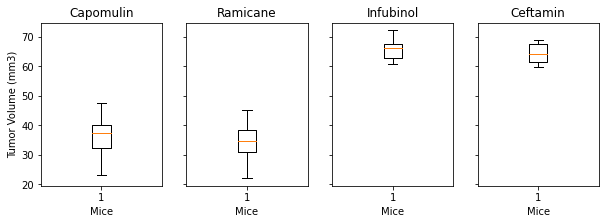

In [42]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, axs = plt.subplots(1, 4, figsize=(10, 3), sharey=True)
axs[0].boxplot(capomulin_each_drug_tumor_volume)
axs[0].set_title('Capomulin')
axs[0].set(ylabel='Tumor Volume (mm3)')

axs[1].boxplot(ramicane_each_drug_tumor_volume)
axs[1].set_title('Ramicane')

axs[2].boxplot(infubinol_each_drug_tumor_volume)
axs[2].set_title('Infubinol')

axs[3].boxplot(ceftamin_each_drug_tumor_volume)
axs[3].set_title('Ceftamin')

for ax in axs.flat:
    ax.set(xlabel='Mice')

print(f"""
Final tumor volume for the 4 most promising treatments

According to these results, there seems to not be outliers on each
of the Drug Treatments
""")

plt.show()

## Line and Scatter Plots

In [43]:
capomulin_data=clean_complete_data.loc[clean_complete_data["Drug Regimen"]=="Capomulin",:]
capomulin_data

capomulin_data=capomulin_data[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]
mice_with_capomulin_data=capomulin_data.groupby("Timepoint").mean().reset_index()
mice_with_capomulin_data

,Timepoint,Tumor Volume (mm3)
0,0,45.000000
1,5,44.266086
2,10,43.084291
3,15,42.064317
4,20,40.716325
5,25,39.939528
6,30,38.769339
7,35,37.816839
8,40,36.958001
9,45,36.236114


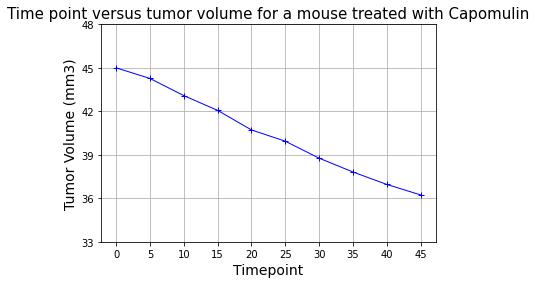

In [44]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

plt.plot(mice_with_capomulin_data["Timepoint"],mice_with_capomulin_data["Tumor Volume (mm3)"],marker='+',color="blue", linewidth=1)
plt.xlabel("Timepoint", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)
plt.title("Time point versus tumor volume for a mouse treated with Capomulin", fontsize=15)
plt.yticks(np.arange(33, 51, 3))
plt.xticks(np.arange(0, 50, 5))
plt.grid()
plt.show()

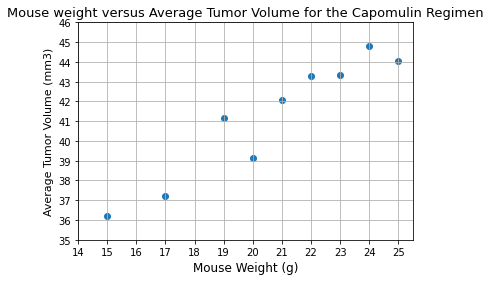

In [45]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_and_weight_data=clean_complete_data.loc[clean_complete_data["Drug Regimen"]=="Capomulin",:]
capomulin_and_weight_data=capomulin_and_weight_data[["Weight (g)","Tumor Volume (mm3)"]]

capomulin_and_weight_data=capomulin_and_weight_data.groupby("Weight (g)").mean()
capomulin_and_weight_data=capomulin_and_weight_data.reset_index()

mouse_weight=capomulin_and_weight_data["Weight (g)"]
tumor_volume=capomulin_and_weight_data["Tumor Volume (mm3)"]

plt.scatter(mouse_weight,tumor_volume)
plt.yticks(np.arange(35, 47, 1))
plt.xticks(np.arange(14, 26, 1))
plt.grid()

plt.title("Mouse weight versus Average Tumor Volume for the Capomulin Regimen", fontsize=13)
plt.xlabel('Mouse Weight (g)',fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=11)

plt.show()

## Correlation and Regression

The correlation coefficient between both factors is 0.95
The r-squared is: 0.9034966277438606


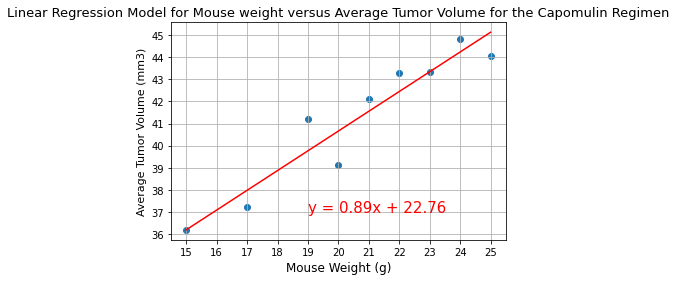

In [48]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(mouse_weight,tumor_volume)
plt.yticks(np.arange(35, 47, 1))
plt.xticks(np.arange(14, 26, 1))
plt.grid()

plt.title("Linear Regression Model for Mouse weight versus Average Tumor Volume for the Capomulin Regimen", fontsize=13)
plt.xlabel('Mouse Weight (g)',fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=11)

plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(19,37),fontsize=15,color="red")

correlation=st.pearsonr(mouse_weight,tumor_volume)
correlation
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")

print(f"The r-squared is: {rvalue**2}")

plt.show()